In [1316]:
import pygad

In [1317]:
labyrinth = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
        [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], 
        [0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0], 
        [0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0], 
        [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0], 
        [0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0], 
        [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0], 
        [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0], 
        [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0], 
        [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0], 
        [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

start = (1, 1)
end = (10, 10)

In [1318]:
# 0 - down, 1 - up, 2 - left, 3 - right
gene_space = [0, 1, 2, 3]

def checkColission(row, col):
    if row > 11 or col > 11 or row < 0 or col < 0:
        return True
    if labyrinth[row][col] == 0:
       return True
    return False

def fitness_func(solution, solution_idx):
    move_counter = 0
    end_row, end_col = end
    row, column = start
    
    for i in solution:
        if row == end_row and column == end_col:
            print("Found solution! The shortest path is ", move_counter)
            return (move_counter * -1)
        if i == 0:
            if not checkColission(row + 1, column):
                row += 1
        if i == 1:
            if not checkColission(row - 1, column):
                row -= 1
        if i == 2:
            if not checkColission(row, column - 1):
                column -= 1
        if i == 3:
            if not checkColission(row, column + 1):
                column += 1
        move_counter += 1

    
    return (((abs(end_col - column) + abs(end_row - row)) * -1) - 1) * move_counter

fitness_function = fitness_func

In [1319]:
sol_per_pop = 180
num_genes = 30

num_parents_mating = 60
num_generations = 900
keep_parents = 45

#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 8

Found solution! The shortest path is  28
Found solution! The shortest path is  28
Found solution! The shortest path is  27
Found solution! The shortest path is  27
Found solution! The shortest path is  28
Found solution! The shortest path is  28
Found solution! The shortest path is  28
Found solution! The shortest path is  27
Found solution! The shortest path is  28
Found solution! The shortest path is  27
Found solution! The shortest path is  27
Found solution! The shortest path is  26
Found solution! The shortest path is  27
Found solution! The shortest path is  29
Found solution! The shortest path is  29
Found solution! The shortest path is  26
Found solution! The shortest path is  26
Found solution! The shortest path is  27
Found solution! The shortest path is  29
Found solution! The shortest path is  27
Found solution! The shortest path is  27
Found solution! The shortest path is  27
Found solution! The shortest path is  28
Found solution! The shortest path is  26
Found solution! 

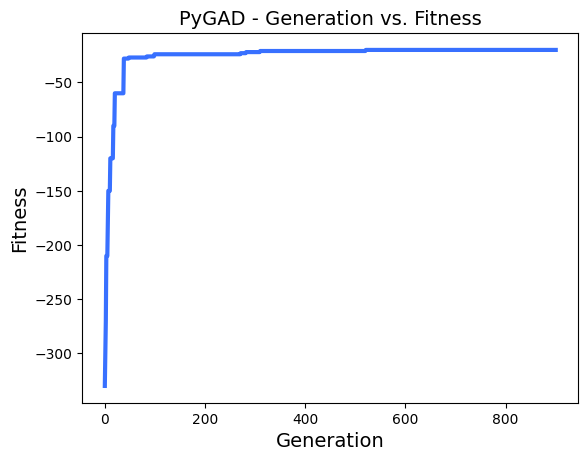

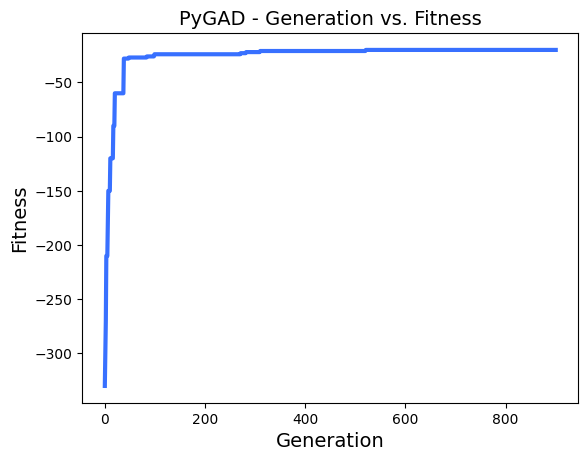

In [1320]:
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))

ga_instance.plot_fitness()